# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [2]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



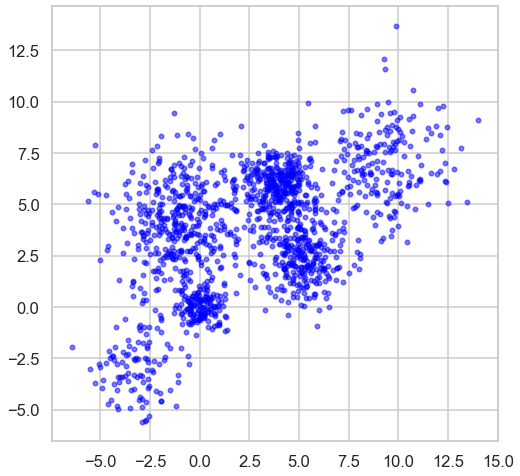

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

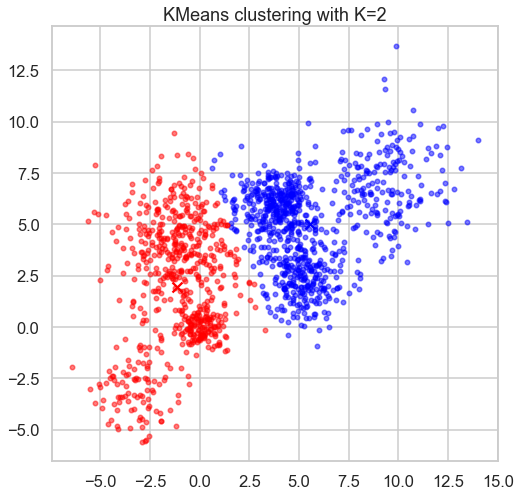

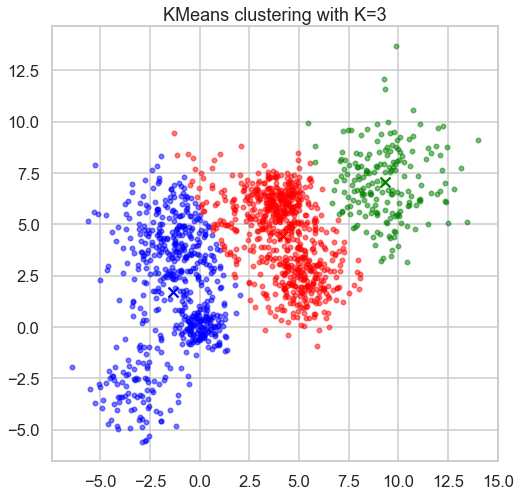

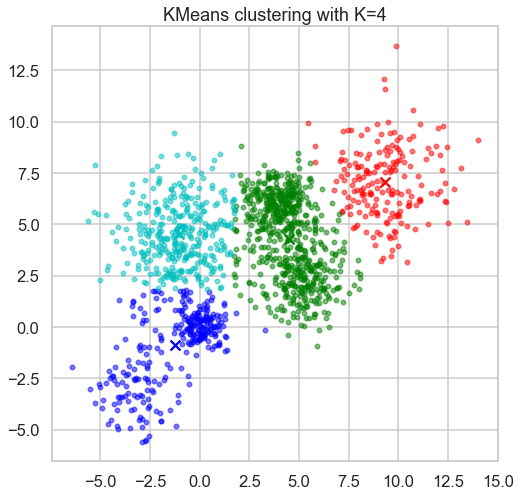

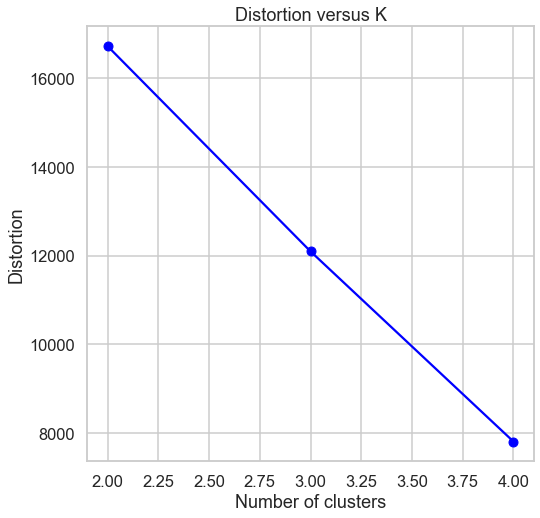

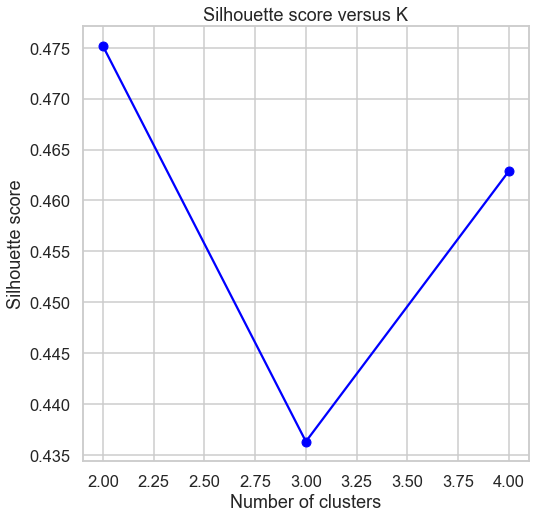

The best K based on silhouette score is 2
The silhouette score for the best K is 0.4751544541991239


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the data points
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
X, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], n_features=2,
                  cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7],
                  centers=centers, shuffle=False, random_state=42)

# Define the range of K values to test 2 inclusive 5 exclusive 
K_range = range(2, 5)

# Initialize empty arrays to store the distortion and silhouette scores
distortions = []
silhouette_scores = []

# Loop over different values of K
for K in K_range:
    # Fit the KMeans model
    k_mean = KMeans(n_clusters=K, random_state=42)
    k_mean.fit(X)
    
    # Calculate the distortion and silhouette score
    distortions.append(k_mean.inertia_)
    silhouette_scores.append(silhouette_score(X, k_mean.labels_))

    # Plot the clustering results
    plt.figure(figsize=(8, 8))
    display_cluster(X, k_mean, K)
    plt.title(f'KMeans clustering with K={K}')
    plt.show()

# Plot the distortion function versus K
plt.figure(figsize=(8, 8))
plt.plot(K_range, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion versus K')
plt.show()

# Plot the silhouette score versus K
plt.figure(figsize=(8, 8))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score versus K')
plt.show()

# Choose the best K based on the silhouette score
best_K = np.argmax(silhouette_scores) + 2
print(f'The best K based on silhouette score is {best_K}')

# Store the silhouette score for the best K
best_silhouette_score = silhouette_scores[best_K - 2]
print(f'The silhouette score for the best K is {best_silhouette_score}')


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

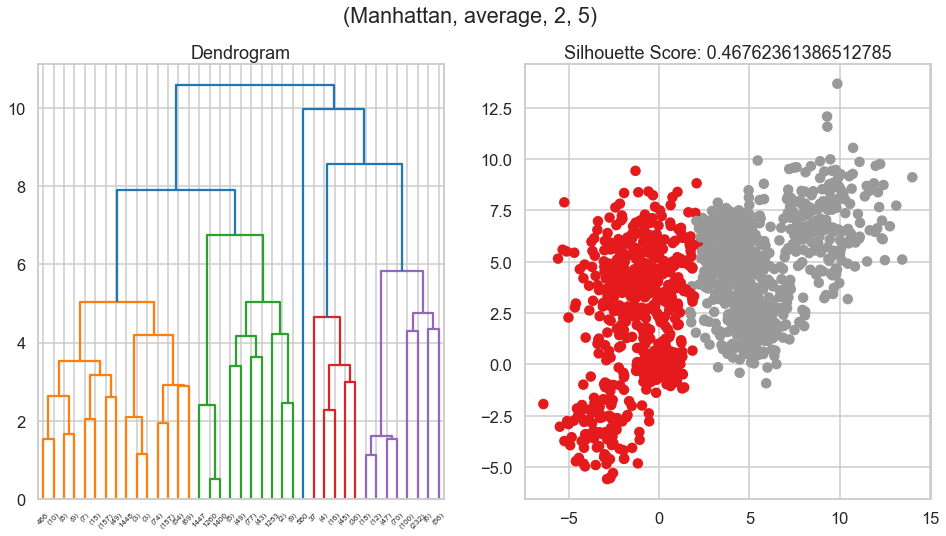

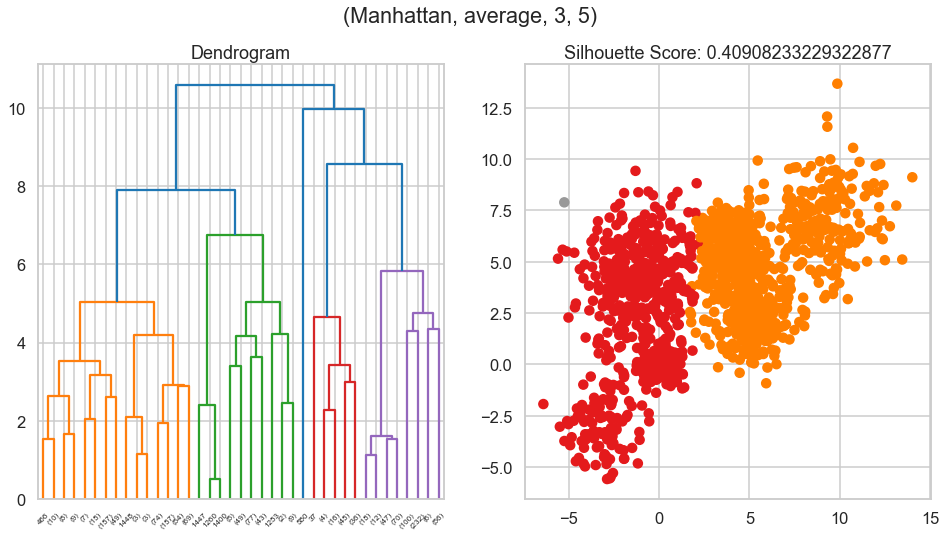

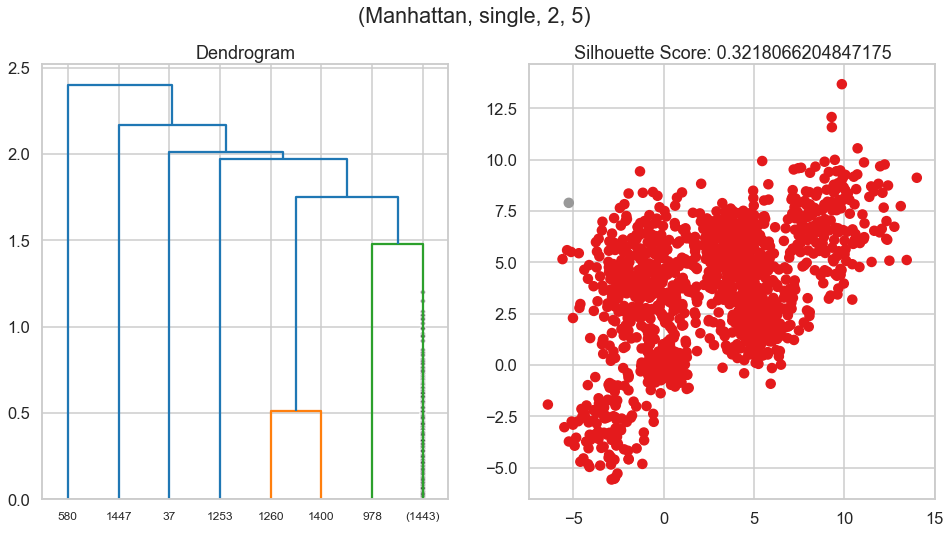

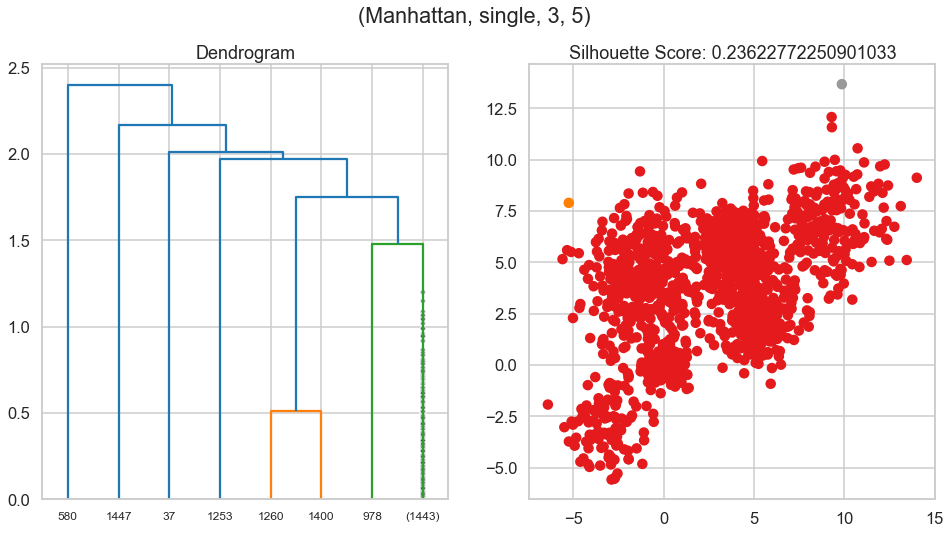

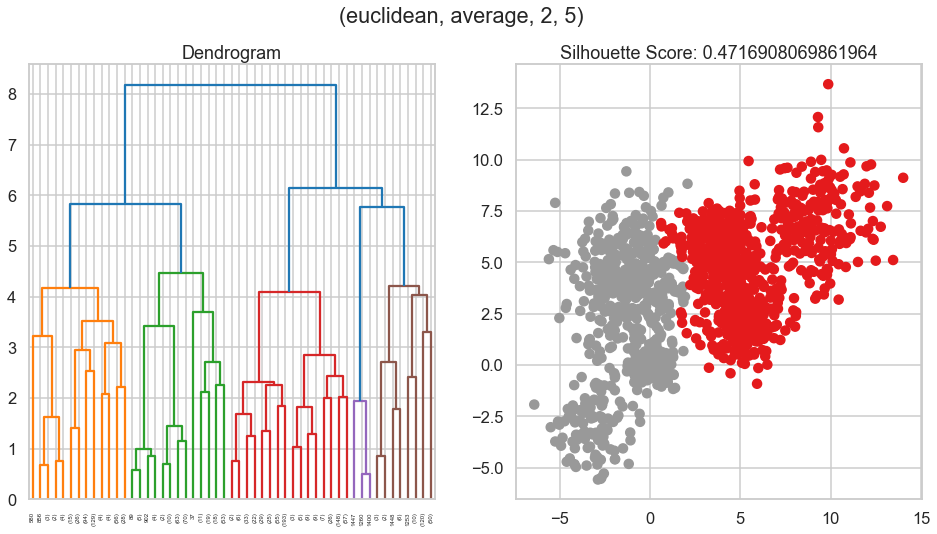

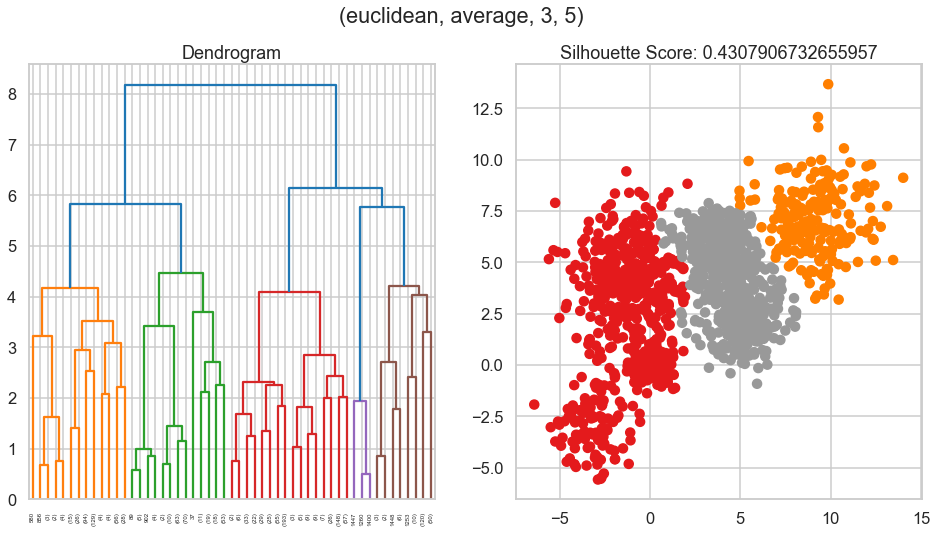

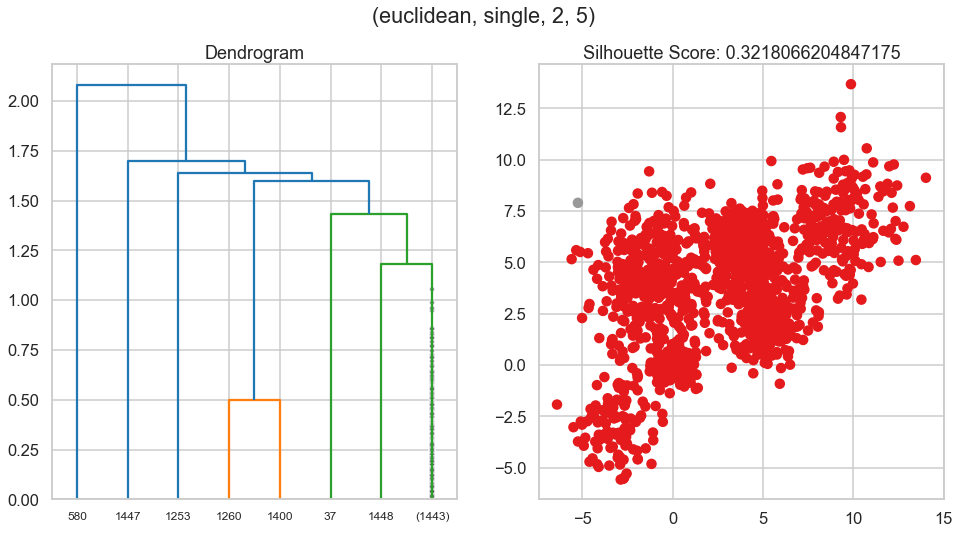

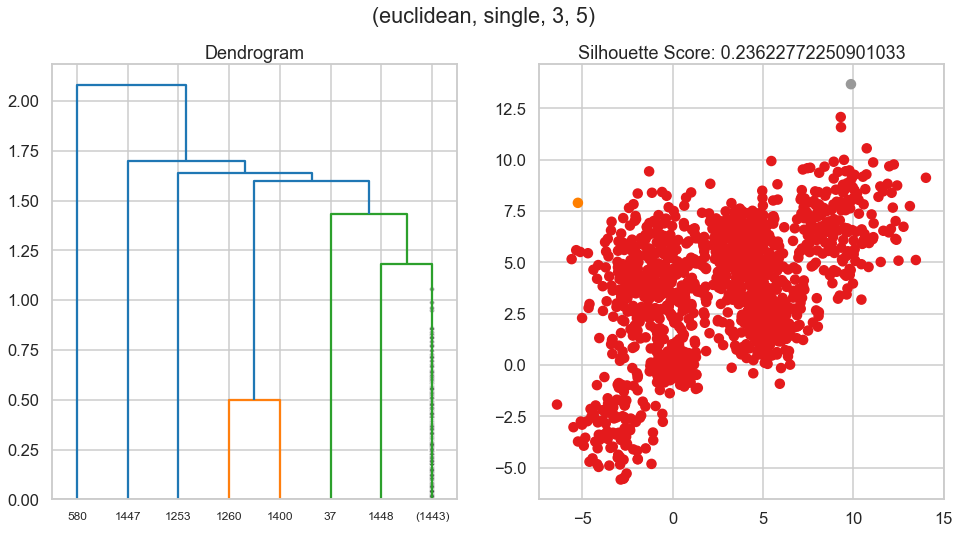

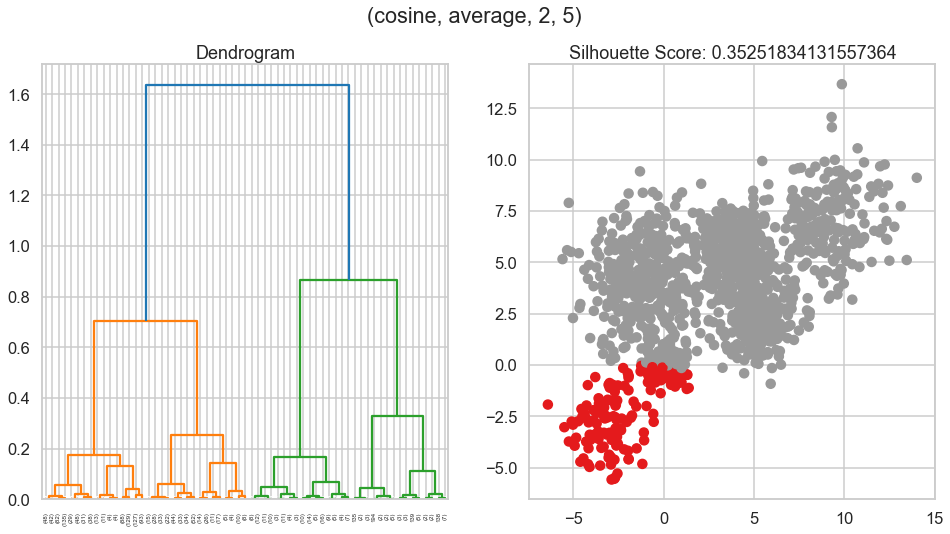

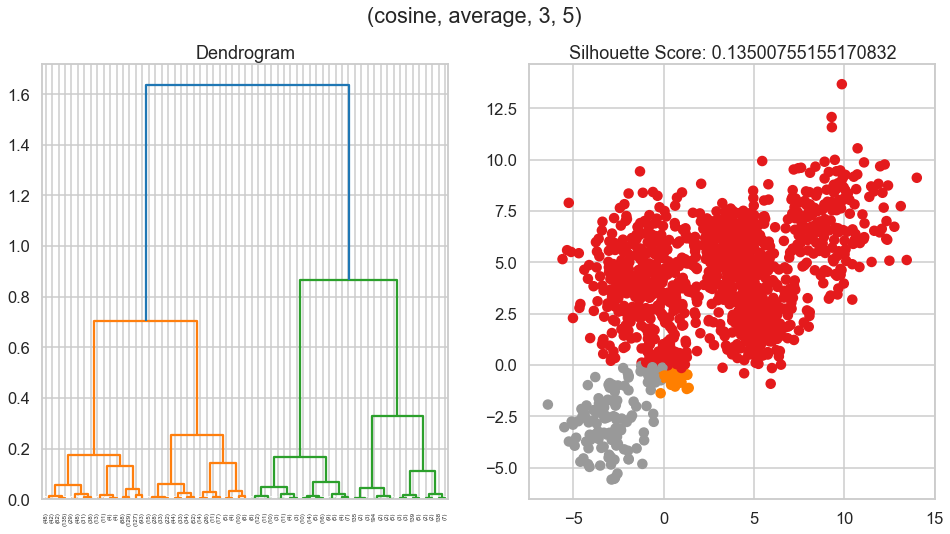

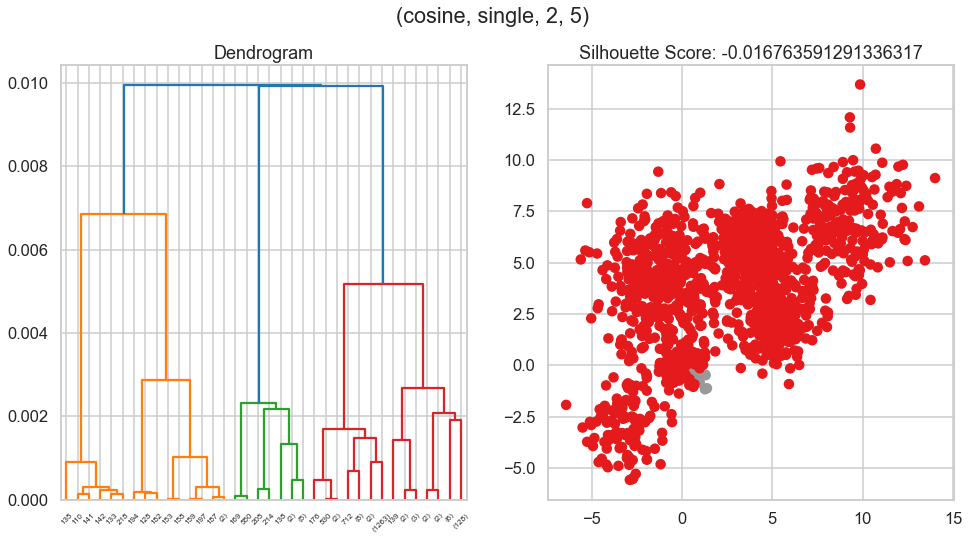

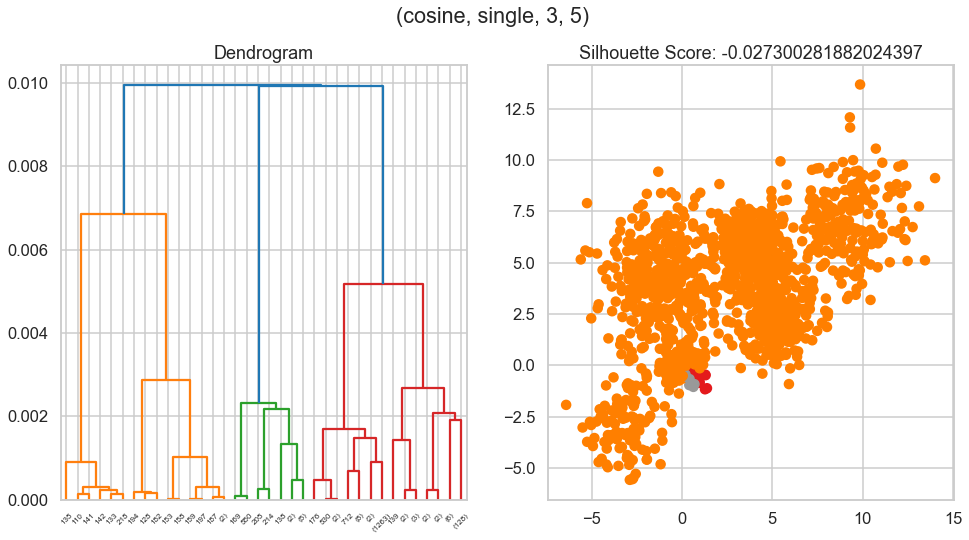

Best parameters: {'affinity': 'euclidean', 'linkage': 'average', 'num_clusters': 2, 'distance_threshold': 5}
Best silhouette score: 0.4716908069861964


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# define parameters to search over
affinities = [ 'cityblock','euclidean', 'cosine']
linkages = ['average', 'single']
num_clusters_range = range(2, 4)
distance_thresholds = [5]

# perform grid search for best parameters
best_score = -1
best_params = {}
for affinity in affinities:
    for linkage_type in linkages:
        for num_clusters in num_clusters_range:
            for distance_threshold in distance_thresholds:
                if num_clusters is not None:
                    model = AgglomerativeClustering(n_clusters=num_clusters, affinity=affinity, linkage=linkage_type)
                else:
                    model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold)
                cluster_labels = model.fit_predict(Multi_blob_Data)
                score = silhouette_score(Multi_blob_Data, cluster_labels)
                # plot dendrogram and clusters
                fig, ax = plt.subplots(1, 2, figsize=(16, 8))
                if affinity != 'cityblock':
                    fig.suptitle(f"({affinity}, {linkage_type}, {num_clusters}, {distance_threshold})")
                else:
                    fig.suptitle(f"({'Manhattan'}, {linkage_type}, {num_clusters}, {distance_threshold})")
                
                Z = linkage(Multi_blob_Data, method=linkage_type, metric=affinity)
                dend = dendrogram(Z, ax=ax[0], truncate_mode='level', p=5, show_contracted=True)
                ax[0].set_title("Dendrogram")
                ax[1].scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=cluster_labels, cmap='Set1')
                ax[1].set_title(f"Silhouette Score: {score}")
                plt.show()
                # check if this set of parameters yields a better score
                if score > best_score:
                    best_score = score
                    best_params = {'affinity': affinity, 'linkage': linkage_type, 'num_clusters': num_clusters, 'distance_threshold': distance_threshold}

# print best parameters and score
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

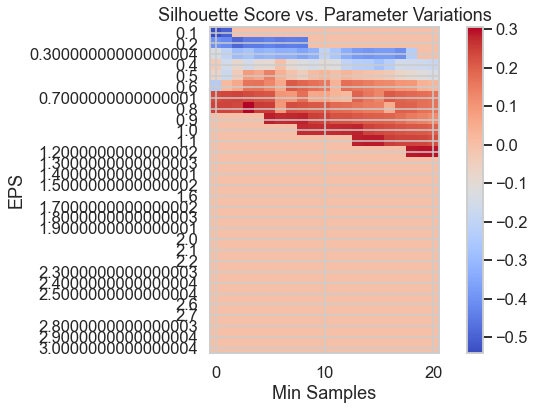

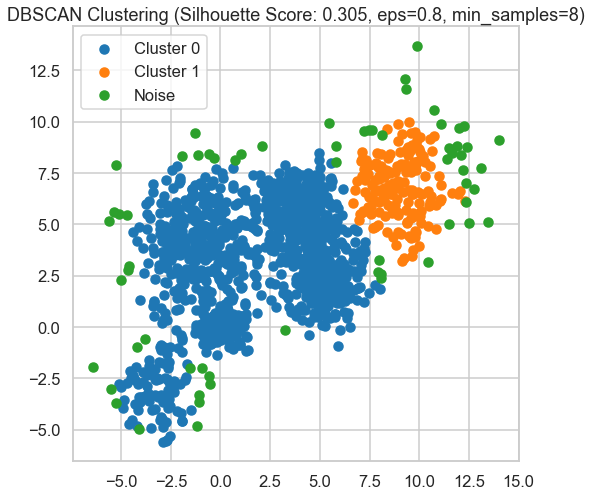

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Helper function to plot DBSCAN clusters
def plot_dbscan_clusters(X, labels, title):
    # Get unique labels and set noise points to -1
    unique_labels = set(labels)
    unique_labels.discard(-1)
    noise_mask = (labels == -1)
    
    # Create scatter plot for each cluster
    for label in unique_labels:
        mask = (labels == label)
        plt.scatter(X[mask, 0], X[mask, 1], label=f'Cluster {label}')
    # Create scatter plot for noise points
    if np.sum(noise_mask) > 0:
        plt.scatter(X[noise_mask, 0], X[noise_mask, 1], label='Noise')
    plt.title(title)
    plt.legend()
    plt.show()

# Parameter variations
eps_range = np.arange(0.1, 3.1, 0.1)
min_samples_range = range(5, 26)

# Store best silhouette score and corresponding parameters
best_silhouette_score = -1
best_params = None

# Silhouette score vs. parameter variations plot
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(Multi_blob_Data)
        if np.max(labels) > 0:
            score = silhouette_score(Multi_blob_Data, labels)
            silhouette_scores[i, j] = score
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_params = (eps, min_samples)

plt.figure(figsize=(10, 6))
plt.imshow(silhouette_scores, cmap='coolwarm')
plt.colorbar()
plt.yticks(range(len(min_samples_range)), min_samples_range)
plt.yticks(range(len(eps_range)), eps_range)
plt.xlabel('Min Samples')
plt.ylabel('EPS')
plt.title('Silhouette Score vs. Parameter Variations')
plt.show()

# DBSCAN clustering plot with best parameters
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
labels = dbscan.fit_predict(Multi_blob_Data)
plot_dbscan_clusters(Multi_blob_Data, labels, f'DBSCAN Clustering (Silhouette Score: {best_silhouette_score:.3f}, eps={best_params[0]}, min_samples={best_params[1]})')


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

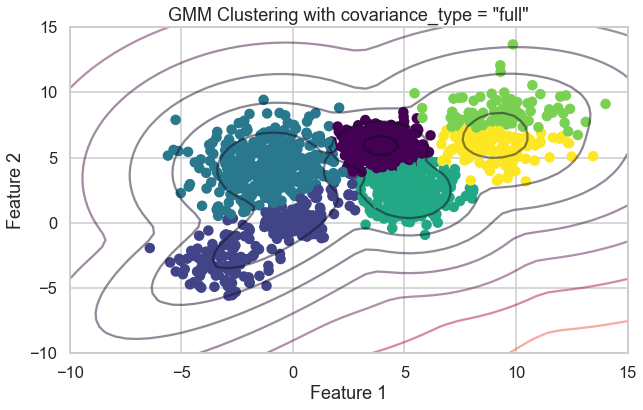

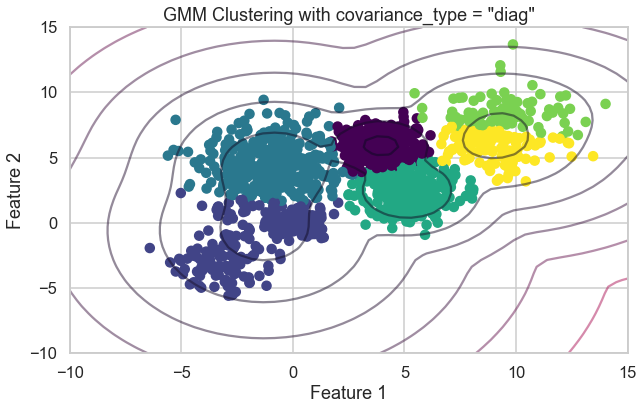

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# define the number of clusters
num_clusters = 6

# fit a GMM model to the data
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=42)
gmm.fit(Multi_blob_Data)

# predict the cluster labels
labels = gmm.predict(Multi_blob_Data)

# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering with covariance_type = "full"')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# plot the contours of the GMM components
x, y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
XX = np.array([x.ravel(), y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=np.logspace(0, 2, 12), alpha=0.5)

# plot the total Gaussian mixture
Z = -gmm.score_samples(XX)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=[np.exp(-2), np.exp(-1), np.exp(-0.5), np.exp(-0.1)], colors='k', alpha=0.8)
plt.show()

# fit a GMM model to the data with covariance_type = "diag"
gmm = GaussianMixture(n_components=num_clusters, covariance_type='diag', random_state=42)
gmm.fit(Multi_blob_Data)

# predict the cluster labels
labels = gmm.predict(Multi_blob_Data)

# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering with covariance_type = "diag"')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# plot the contours of the GMM components
x, y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
XX = np.array([x.ravel(), y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=np.logspace(0, 2, 12), alpha=0.5)

# plot the total Gaussian mixture
Z = -gmm.score_samples(XX)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=[np.exp(-2), np.exp(-1), np.exp(-0.5), np.exp(-0.1)], colors='k', alpha=0.8)
plt.show()


#The above code performs GMM clustering with covariance_type="full" and then with covariance_type="diag". 
#It then plots the resulting distribution in a 2D scatter plot and overlays the contours of the GMM components as
#well as the total Gaussian mixture using contour plots.

#Note that the np.logspace() function is used to generate a set of levels for the contour plots based on a 
#logarithmic scale. The contour levels for the total Gaussian mixture are specified manually using the levels parameter. 
#The contour levels for the GMM components are automatically generated using the levels parameter with `np


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

### KMEANS


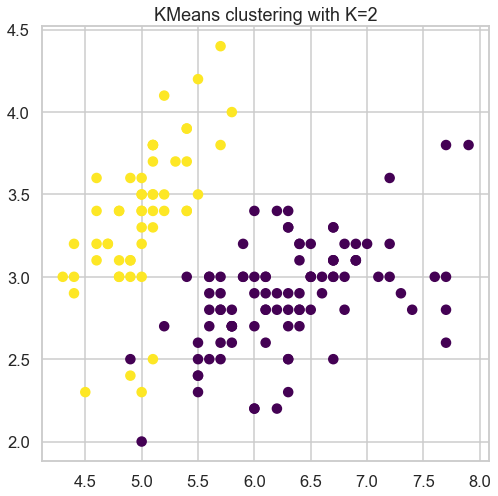

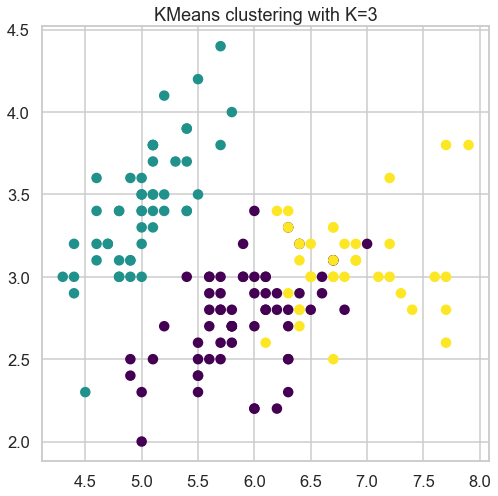

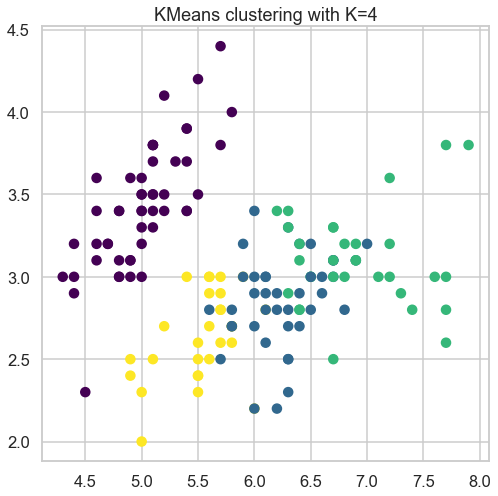

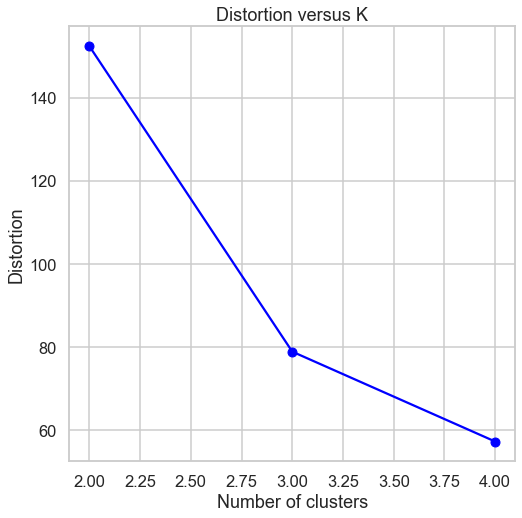

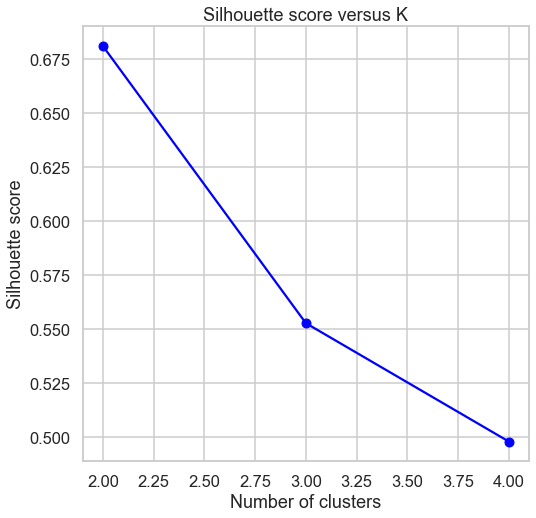

The best K based on silhouette score is 2
The silhouette score for the best K is 0.681046169211746


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

# Load the iris data set
iris_data = load_iris()

# Get the features and target values
X = iris_data.data
y = iris_data.target[[10, 25, 50]]

# Define the range of K values to test
K_range = range(2, 5)

# Initialize empty arrays to store the distortion and silhouette scores
distortions = []
silhouette_scores = []

# Loop over different values of K
for K in K_range:
    # Fit the KMeans model
    k_mean = KMeans(n_clusters=K, random_state=42)
    k_mean.fit(X)
    
    # Calculate the distortion and silhouette score
    distortions.append(k_mean.inertia_)
    silhouette_scores.append(silhouette_score(X, k_mean.labels_))

    # Plot the clustering results
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=k_mean.labels_, cmap='viridis')
    plt.title(f'KMeans clustering with K={K}')
    plt.show()

# Plot the distortion function versus K
plt.figure(figsize=(8, 8))
plt.plot(K_range, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion versus K')
plt.show()

# Plot the silhouette score versus K
plt.figure(figsize=(8, 8))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score versus K')
plt.show()

# Choose the best K based on the silhouette score
best_K = np.argmax(silhouette_scores) + 2
print(f'The best K based on silhouette score is {best_K}')

# Store the silhouette score for the best K
best_silhouette_score = silhouette_scores[best_K - 2]
print(f'The silhouette score for the best K is {best_silhouette_score}')


### Hierarchal Clustering


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# load iris dataset
iris_data = load_iris()
iris_features = iris_data.data

# define parameters to search over
affinities = ['euclidean', 'cosine','cityblock']
linkages = ['average', 'single']
num_clusters_range = range(2, 4)
distance_thresholds = [4, 6]

# perform grid search for best parameters
best_score = -1
best_params = {}
for affinity in affinities:
    for linkage_type in linkages:
        for num_clusters in num_clusters_range:
            for distance_threshold in distance_thresholds:
                if num_clusters is not None:
                    model = AgglomerativeClustering(n_clusters=num_clusters, affinity=affinity, linkage=linkage_type)
                else:
                    model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold)
                cluster_labels = model.fit_predict(iris_features)
                score = silhouette_score(iris_features, cluster_labels)
                # plot dendrogram and clusters
                fig, ax = plt.subplots(1, 2, figsize=(16, 8))
                if affinity != 'cityblock':
                    fig.suptitle(f"({affinity}, {linkage_type}, {num_clusters}, {distance_threshold})")
                else:
                    fig.suptitle(f"({'Manhattan'}, {linkage_type}, {num_clusters}, {distance_threshold})")
                
                Z = linkage(iris_features, method=linkage_type, metric=affinity)
                dend = dendrogram(Z, ax=ax[0], truncate_mode='level', p=5, show_contracted=True)
                ax[0].set_title("Dendrogram")
                ax[1].scatter(iris_features[:,0], iris_features[:,1], c=cluster_labels, cmap='Set1')
                ax[1].set_title(f"Silhouette Score: {score}")
                plt.show()
                # check if this set of parameters yields a better score
                if score > best_score:
                    best_score = score
                    best_params = {'affinity': affinity, 'linkage': linkage_type, 'num_clusters': num_clusters, 'distance_threshold': distance_threshold}

# print best parameters and score
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")


###  DBSCAN


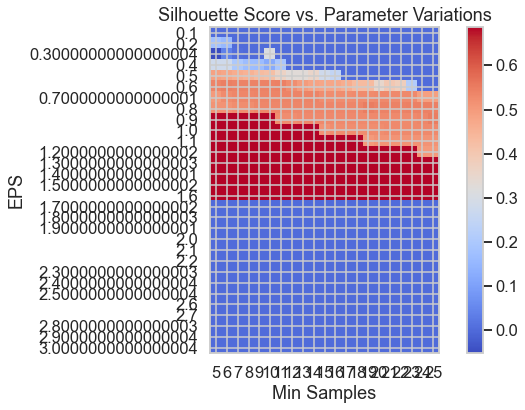

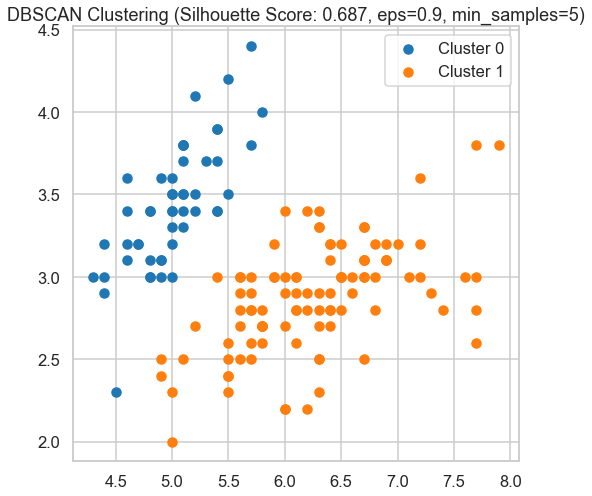

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris data set
iris_data = load_iris()
X = iris_data.data

# Helper function to plot DBSCAN clusters
def plot_dbscan_clusters(X, labels, title):
    # Get unique labels and set noise points to -1
    unique_labels = set(labels)
    unique_labels.discard(-1)
    noise_mask = (labels == -1)
    
    # Create scatter plot for each cluster
    for label in unique_labels:
        mask = (labels == label)
        plt.scatter(X[mask, 0], X[mask, 1], label=f'Cluster {label}')
    # Create scatter plot for noise points
    if np.sum(noise_mask) > 0:
        plt.scatter(X[noise_mask, 0], X[noise_mask, 1], label='Noise')
    plt.title(title)
    plt.legend()
    plt.show()

# Parameter variations
eps_range = np.arange(0.1, 3.1, 0.1)
min_samples_range = range(5, 26)

# Store best silhouette score and corresponding parameters
best_silhouette_score = -1
best_params = None

# Silhouette score vs. parameter variations plot
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if np.max(labels) > 0:
            score = silhouette_score(X, labels)
            silhouette_scores[i, j] = score
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_params = (eps, min_samples)

plt.figure(figsize=(10, 6))
plt.imshow(silhouette_scores, cmap='coolwarm')
plt.colorbar()
plt.yticks(range(len(eps_range)), eps_range)
plt.xticks(range(len(min_samples_range)), min_samples_range)
plt.ylabel('EPS')
plt.xlabel('Min Samples')
plt.title('Silhouette Score vs. Parameter Variations')
plt.show()

# DBSCAN clustering plot with best parameters
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
labels = dbscan.fit_predict(X)
plot_dbscan_clusters(X, labels, f'DBSCAN Clustering (Silhouette Score: {best_silhouette_score:.3f}, eps={best_params[0]}, min_samples={best_params[1]})')


### GAUSSIAN


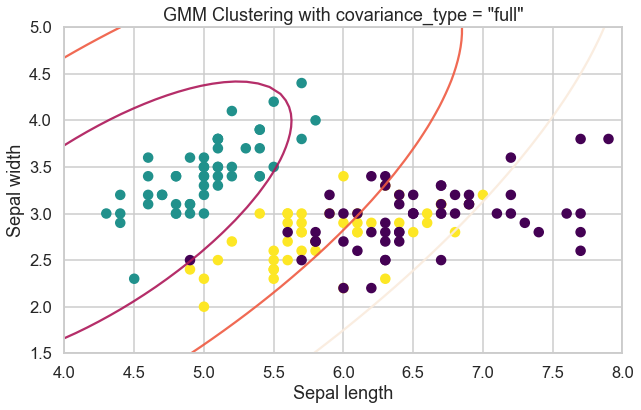

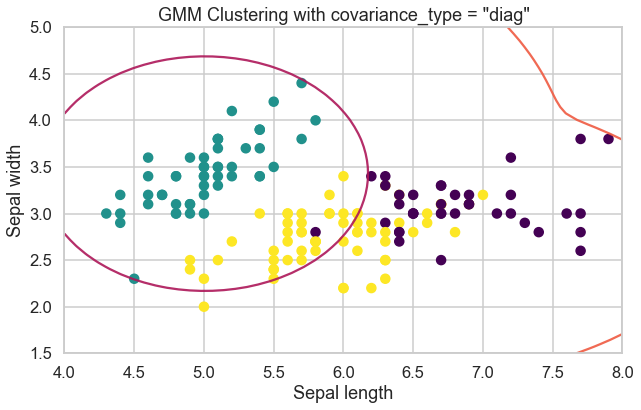

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

# load the Iris dataset
iris = load_iris()
X = iris.data

# define the number of clusters
num_clusters = 3

# fit a GMM model to the data with covariance_type="full"
gmm_full = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=42)
gmm_full.fit(X)

# predict the cluster labels
labels_full = gmm_full.predict(X)

# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_full, cmap='viridis')
plt.title('GMM Clustering with covariance_type = "full"')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# plot the contours of the GMM components
x, y = np.meshgrid(np.linspace(4, 8), np.linspace(1.5, 5))
XX = np.array([x.ravel(), y.ravel(), np.zeros_like(x.ravel()), np.zeros_like(x.ravel())]).T
Z = -gmm_full.score_samples(XX)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=np.logspace(0, 2, 12), alpha=0.9)

# fit a GMM model to the data with covariance_type="diag"
gmm_diag = GaussianMixture(n_components=num_clusters, covariance_type='diag', random_state=42)
gmm_diag.fit(X)

# predict the cluster labels
labels_diag = gmm_diag.predict(X)

# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_diag, cmap='viridis')
plt.title('GMM Clustering with covariance_type = "diag"')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# plot the contours of the GMM components
x, y = np.meshgrid(np.linspace(4, 8), np.linspace(1.5, 5))
XX = np.array([x.ravel(), y.ravel(), np.zeros_like(x.ravel()), np.zeros_like(x.ravel())]).T
Z = -gmm_diag.score_samples(XX)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=np.logspace(0, 2, 12), alpha=0.9)


plt.show()


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 